* Load the data
* Clean the data
* Aggregate the data and compute summary statistics
* Visualize the data

# Load the data
First load the data into a pandas data frame.  
I do this so I can use pandas and numpy to clean the data frame.  

In [200]:
import pandas as pd
import numpy as np

patient_data_to_clean_df = pd.read_csv("patient_data_to_clean.csv", index_col=0)

print(patient_data_to_clean_df)



     Gender  Age Marital Status  RIC  Admission Total FIM Score  \
ID                                                                
0         M   80        Widowed    8                         40   
1         M   90       Divorced    1                         65   
2         M   53        Married    2                         67   
3         F   69        Married   15                         41   
4         F   80        Married    3                         66   
...     ...  ...            ...  ...                        ...   
4550      F   20        Married    4                         39   
4551      M   82        Widowed    3                         59   
4552      M   44        Married   18                         39   
4553      M   46        Married    2                         74   
4554      M   81         Single    3                         60   

      Discharge Total FIM Score  
ID                               
0                            89  
1                         

## How I will approach this
I am going to start by making sure all the columns have the correct data type.

### Gender

In [201]:
patient_data_to_clean_df = patient_data_to_clean_df.astype({'Gender':'string'})
print(patient_data_to_clean_df.dtypes)


Gender                       string
Age                           int64
Marital Status               object
RIC                           int64
Admission Total FIM Score     int64
Discharge Total FIM Score     int64
dtype: object


### Age

In [202]:
patient_data_to_clean_df = patient_data_to_clean_df.astype({'Age':'int'})
print(patient_data_to_clean_df.dtypes)


Gender                       string
Age                           int32
Marital Status               object
RIC                           int64
Admission Total FIM Score     int64
Discharge Total FIM Score     int64
dtype: object


### RIC
(This will be changed later, but now I am just converting it to Ints)

In [203]:
patient_data_to_clean_df = patient_data_to_clean_df.astype({'RIC':'int'})
print(patient_data_to_clean_df.dtypes)

Gender                       string
Age                           int32
Marital Status               object
RIC                           int32
Admission Total FIM Score     int64
Discharge Total FIM Score     int64
dtype: object


### Admission Total FIM Score

In [204]:
patient_data_to_clean_df = patient_data_to_clean_df.astype({'Admission Total FIM Score':'int'})
print(patient_data_to_clean_df.dtypes)

Gender                       string
Age                           int32
Marital Status               object
RIC                           int32
Admission Total FIM Score     int32
Discharge Total FIM Score     int64
dtype: object


### Discharge Total FIM Score

In [205]:
patient_data_to_clean_df = patient_data_to_clean_df.astype({'Discharge Total FIM Score':'int'})
print(patient_data_to_clean_df.dtypes)

Gender                       string
Age                           int32
Marital Status               object
RIC                           int32
Admission Total FIM Score     int32
Discharge Total FIM Score     int32
dtype: object


# Cleaning
The following columns require further cleaning.

## RIC Codes
The RIC code reffers to a specific incident that happened to the patient.

I am now replacing the ints in the RIC column with their related string.

First I create a new array.

In [206]:
ric_decoder = {1: "Stroke", 2: "TBI", 3: "NTBI", 4: "TSCI", 5: "NTSCI", 6: "Neuro", 7: "FracLE", 8: "ReplLE", 9: "Ortho", 10: "AMPLE", 11: "AMP-NLE", 12: "OsteoA", 13: "RheumA", 14: "Cardiac", 15: "Pulmonary", 16: "Pain", 17: "MMT-NBSCI", 18: "MMT-BSCI", 19: "GB", 20: "Misc", 21: "Burns"}

Now I use a for loop to copy over their respective values.

#### WARNING: only run this next bit of code ONCE per Kernel

In [207]:
pd.options.mode.chained_assignment = None  # This removes a warning message

for i in range(patient_data_to_clean_df["RIC"].count()):
    RIC_value = patient_data_to_clean_df["RIC"][i]
    patient_data_to_clean_df["RIC"][i] = ric_decoder[RIC_value]
patient_data_to_clean_df = patient_data_to_clean_df.astype({'RIC':'string'}) # Change the dtype
print(patient_data_to_clean_df["RIC"])

ID
0          ReplLE
1          Stroke
2             TBI
3       Pulmonary
4            NTBI
          ...    
4550         TSCI
4551         NTBI
4552     MMT-BSCI
4553          TBI
4554         NTBI
Name: RIC, Length: 4555, dtype: string


## Marital Status
You may have noticed that I saved Marital Status for last, that is because marital status is complex in the way where there are noisey responses.  

In order to fix this I will need the help of Pandas, as well as a lambda function.

A lambda function is similar to a loop in the way where you can use it to access each of the values of a given dataset, and perform specific functions on them.  
In this case I applied:
* .strip()
    * this removes all trailing whitelines, as well as the parameters. The parameters I pass in are:
        * .
        * \
        * /
        * \-
        * _
* .lower()
    * this makes the strings lowercase

Following this I continue by making sure the dtype is a string

In [208]:
patient_data_to_clean_df["Marital Status"] = patient_data_to_clean_df["Marital Status"].apply(lambda x: x.strip(".\/-_").lower())
patient_data_to_clean_df = patient_data_to_clean_df.astype({'Marital Status':'string'})
print(patient_data_to_clean_df["Marital Status"])

ID
0        widowed
1       divorced
2        married
3        married
4        married
          ...   
4550     married
4551     widowed
4552     married
4553     married
4554      single
Name: Marital Status, Length: 4555, dtype: string


## Marital Status NaN's
We have a problem.

There are 'noisy' responses, and since there are alot of them, we can just replace them with the value NULL.  
To achieve this I used a if statement in a for loop that checks to see if it one of the 

Now I use a for loop to copy over their respective values.

#### WARNING: only run this next bit of code ONCE per Kernel

In [209]:
for i in range(patient_data_to_clean_df["Marital Status"].count()):
    if (
        patient_data_to_clean_df["Marital Status"][i] != "never married"
        and patient_data_to_clean_df["Marital Status"][i] != "separated"
        and patient_data_to_clean_df["Marital Status"][i] != "divorced"
        and patient_data_to_clean_df["Marital Status"][i] != "widowed"
        and patient_data_to_clean_df["Marital Status"][i] != "separated"
        and patient_data_to_clean_df["Marital Status"][i] != "married"
    ):
        patient_data_to_clean_df["Marital Status"][i] = np.NaN
    
print(patient_data_to_clean_df)


     Gender  Age Marital Status        RIC  Admission Total FIM Score  \
ID                                                                      
0         M   80        widowed     ReplLE                         40   
1         M   90       divorced     Stroke                         65   
2         M   53        married        TBI                         67   
3         F   69        married  Pulmonary                         41   
4         F   80        married       NTBI                         66   
...     ...  ...            ...        ...                        ...   
4550      F   20        married       TSCI                         39   
4551      M   82        widowed       NTBI                         59   
4552      M   44        married   MMT-BSCI                         39   
4553      M   46        married        TBI                         74   
4554      M   81           <NA>       NTBI                         60   

      Discharge Total FIM Score  
ID              

# Output to a file
Now that have successfully cleaned all of the data, I can output it to a new file using Pandas built in to_csv() function.

In [210]:
patient_data_to_clean_df.to_csv("patient_data_cleaned.csv")

# Aggregate the Data
I am now creating a new Series with the following stats:
* patients_total: total number of patients
* males_total: total number of males
* females_total: total number of females
* married_total: total number of married patients
* most_common_RIC: RIC label for the most commonly occurring RIC
* most_common_RIC_total: total number of patients with the most commonly occurring RIC
* stroke_age_avg: average age for stroke patients
* stroke_age_std: standard deviation of age for stroke patients
* stroke_age_male_avg: average age for male stroke patients
* stroke_age_male_std: standard deviation of age for male stroke patients
* stroke_age_female_avg: average age for female stroke patients
* stroke_age_female_std: standard deviation of age for female stroke patients

In [211]:
patient_data_stats = pd.Series(dtype=float)

patient_data_cleaned = pd.read_csv("patient_data_cleaned.csv", index_col=0)

# patients_total: total number of patients
patient_data_stats["patients_total"] = patient_data_cleaned.count()[0]

# males_total: total number of males
patient_data_stats["males_total"] = (patient_data_cleaned["Gender"] == "M").sum()

# females_total: total number of females
patient_data_stats["females_total"] = patient_data_stats["patients_total"] - patient_data_stats["males_total"]

# married_total: total number of married patients
patient_data_stats["married_total"] = (patient_data_cleaned["Marital Status"] == "married").sum()

# most_common_RIC: RIC label for the most commonly occurring RIC
most_occuring_RIC = patient_data_cleaned["RIC"].mode()
patient_data_stats["most_common_RIC"] = patient_data_cleaned["RIC"].mode()

# most_common_RIC_total: total number of patients with the most commonly occurring RIC
patient_data_stats["most_common_RIC_total"] = patient_data_cleaned.value_counts(["Gender","RIC"])["M"][patient_data_cleaned["RIC"].mode()] + patient_data_cleaned.value_counts(["Gender","RIC"])["F"][patient_data_cleaned["RIC"].mode()]

# stroke_age_avg: average age for stroke patients
temp_df = patient_data_cleaned.groupby("RIC")["Age"].mean()
patient_data_stats["stroke_age_avg"] = temp_df["Stroke"]

# stroke_age_std: standard deviation of age for stroke patients
temp_df = patient_data_cleaned.groupby("RIC")["Age"].std()
patient_data_stats["stroke_age_std"] = temp_df["Stroke"]

# stroke_age_male_avg: average age for male stroke patients
new_df = pd.DataFrame(dtype=float)
newer_df = pd.DataFrame(dtype=float)
entry = patient_data_cleaned.loc[patient_data_cleaned["Gender"] == "M"]
new_df = pd.concat([new_df,entry])
entry2 = new_df.loc[new_df["RIC"] == "Stroke"]
newer_df = pd.concat([newer_df,entry2])

patient_data_stats["stroke_age_male_avg"] = newer_df["Age"].mean()


# stroke_age_male_std: standard deviation of age for male stroke patients
patient_data_stats["stroke_age_male_std"] = newer_df["Age"].std()

# stroke_age_female_avg: average age for female stroke patients
new_df = pd.DataFrame(dtype=float)
newer_df = pd.DataFrame(dtype=float)
entry = patient_data_cleaned.loc[patient_data_cleaned["Gender"] == "F"]
new_df = pd.concat([new_df,entry])
entry2 = new_df.loc[new_df["RIC"] == "Stroke"]
newer_df = pd.concat([newer_df,entry2])

patient_data_stats["stroke_age_female_avg"] = newer_df["Age"].mean()

# stroke_age_female_std: standard deviation of age for female stroke patients
patient_data_stats["stroke_age_female_std"] = newer_df["Age"].std()

print(patient_data_stats)

patients_total                                      4555
males_total                                         2242
females_total                                       2313
married_total                                       2244
most_common_RIC                0    Stroke
dtype: object
most_common_RIC_total    RIC
Stroke    1169
dtype: int64
stroke_age_avg                                 71.292558
stroke_age_std                                 14.340883
stroke_age_male_avg                             70.07743
stroke_age_male_std                            13.841474
stroke_age_female_avg                          72.604982
stroke_age_female_std                          14.761702
dtype: object


# Results
Some things I noticed:
* Women have a higher average age than men for being a victim of a stroke
* Women also have a higher standard deviation

# Graphical Visualization
For each RIC with enough data, produce the following charts (histograms and scatter plots) using Matplotlib.


First I make a variable called threshold.  
This will determine the minimum amount of patients with a certain RIC value in order for it to be graphed using Maatplotlib.

In [212]:
threshold = 250

## Histograms

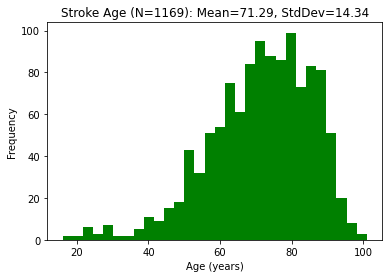

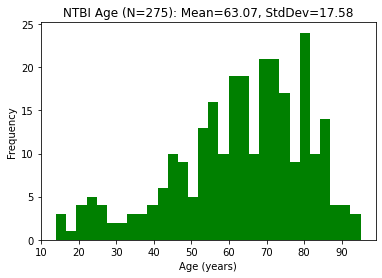

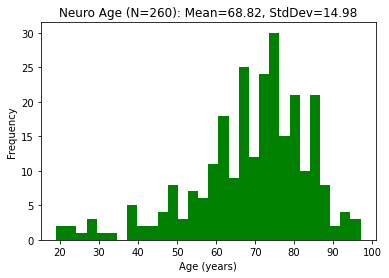

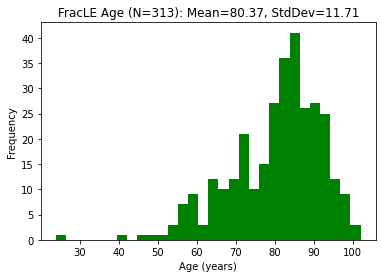

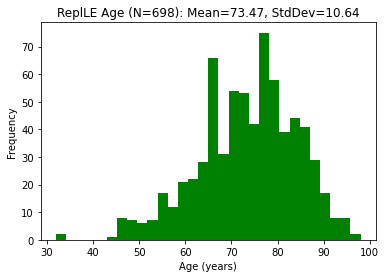

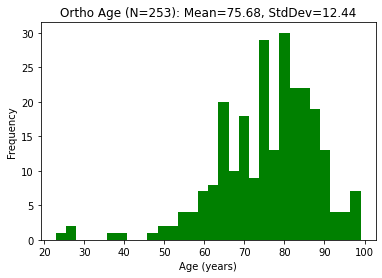

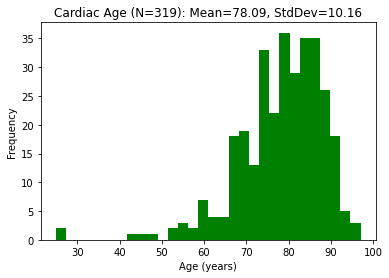

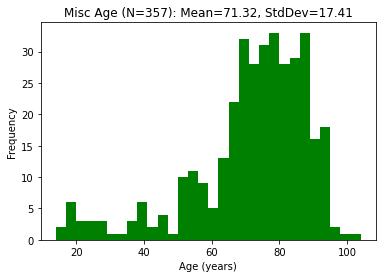

In [213]:
import matplotlib.pyplot as plt

for ric_value in  ric_decoder:
    ric_df = pd.Series(dtype=object)

    ric_values = patient_data_cleaned.loc[patient_data_cleaned["RIC"] == ric_decoder[ric_value]]
    ric_df = pd.concat([ric_df,ric_values])

    if ric_df["Age"].count() >= threshold:
        plt.figure()
        # by default there are 10 bins, aka, intervals
        plt.hist(ric_df["Age"], bins=30, color="Green")
        plt.title(ric_decoder[ric_value] +" Age (N=" + str(ric_df["Age"].count()) + "): Mean=" + str(round(ric_df["Age"].mean(),2)) + ", StdDev=" + str(round(ric_df["Age"].std(),2)))
        plt.xlabel("Age (years)")
        plt.ylabel("Frequency")

        plt.show()


## Scatter Plots

X axis label: Admission FIM score

Y axis label: Discharge FIM score

Title: "<RIC> (N=<total>)"

Male scatter points: Blue, circle markers ("."), size 100, label "Male (N=<total>)"

Female scatter points: Red, plus markers ("+"), size 100, label "Female (N=<total>)"

Y = X line: Black, dashed line style ("--"), x limits and y limits are [0, 140]

This is called a "no change" line, Y = X. This line represents when the discharge FIM 
score is the same as the admission FIM score. Patients above this line showed a FIM 
score improvement, patients below this line showed a regression.

Legend: lower right corner ("4")

Example:

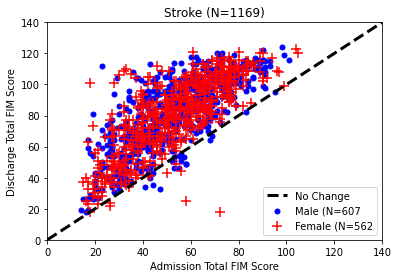

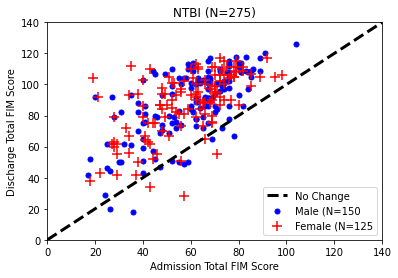

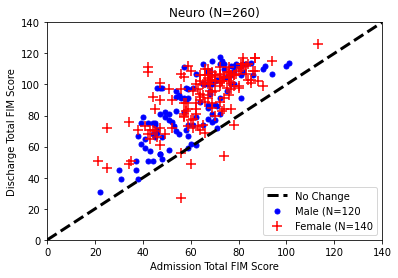

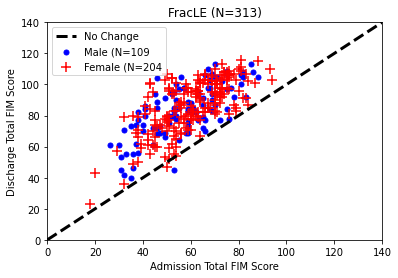

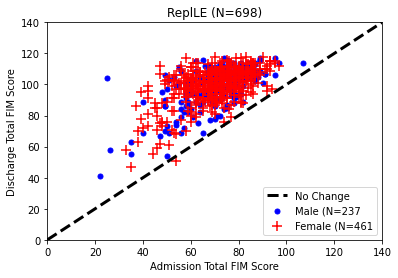

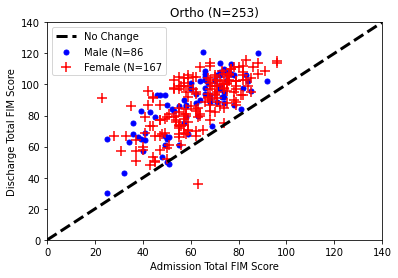

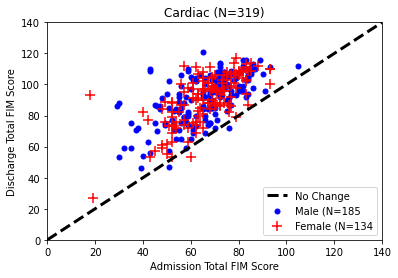

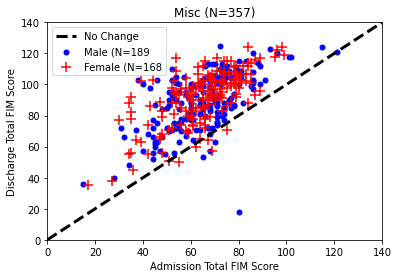

In [214]:
for ric_value in  ric_decoder:
    ric_df = pd.Series(dtype=object)

    ric_values = patient_data_cleaned.loc[patient_data_cleaned["RIC"] == ric_decoder[ric_value]]
    ric_df = pd.concat([ric_df,ric_values])

    if ric_df["Age"].count() >= threshold:
        plt.figure()
        
        # Make a specific dataframe of the male stats
        male_df = pd.DataFrame(dtype=float)
        male_df_entries = ric_df.loc[ric_df["Gender"] == "M"]
        male_df = pd.concat([male_df,male_df_entries])

        # Make a specific dataframe of the female stats
        female_df = pd.DataFrame(dtype=float)
        female_df_entries = ric_df.loc[ric_df["Gender"] == "F"]
        female_df = pd.concat([female_df,female_df_entries])


        plt.title(ric_decoder[ric_value] +" (N=" + str(ric_df["Age"].count()) + ")")

        plt.scatter(male_df["Admission Total FIM Score"],male_df["Discharge Total FIM Score"],color="blue",marker='.',s=100,label=("Male (N=" + str(male_df["Age"].count())))
        plt.scatter(female_df["Admission Total FIM Score"],female_df["Discharge Total FIM Score"],color="red",marker='+',s=100,label=("Female (N=" + str(female_df["Age"].count())))
        plt.plot([0,140],[0,140], color="black", linestyle='--',linewidth=3,label="No Change") # No change line
        plt.xlim(0,140)
        plt.ylim(0,140)

        # Labels
        plt.xlabel("Admission Total FIM Score")
        plt.ylabel("Discharge Total FIM Score")

        plt.legend()

        plt.show()




### Observations
The obvious observation is that almost all patients have a higher Discharge FIM Score when compared to their Admission FIM Score

It also seems that the men's scores are consistenly spread out, whereas the females scores have more of a variety.
* see how on RepILE the female datapoints are extremely compact
    * compare this to NTBI, where although there is a point that seems to be more clustered, it is much more spread out than the RepILE.
* when it comes to males, it seems that they have a focal point, yet consistently have a decent amount of variation to the scores.